# 过拟合与欠拟合

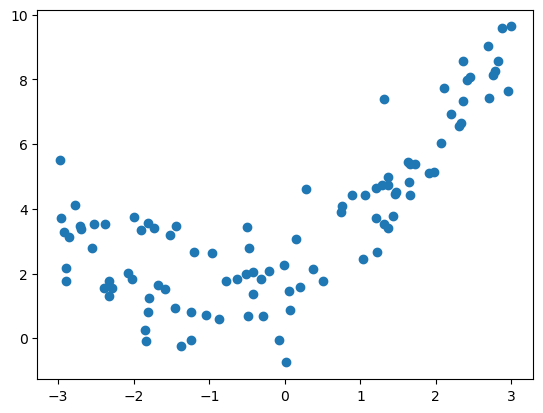

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组2次函数关系的数据，并且包含一定的噪音
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

## 使用线性回归

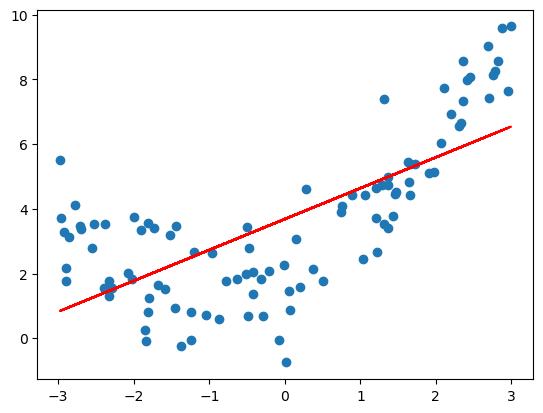

0.4953707811865009

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
plt.plot(x, y_predict, color="r")
plt.scatter(x, y)
plt.show()
lin_reg.score(X, y)

R-Squared这个值可以看出来，直接使用线性回归并不好，数据之间没有线性关系，或者说很弱。  
多项式回归本质只是增加样本特征，仍然使用线性回归的思路。  
多项式回归中求解的那个方程实际上和线性回归的方程是不一样的，系数个数不同，维度也是不同的，使用R方这个指标来描述两个方程不一样的模型有点不太妙，感觉不太有可比性  
这里使用均方误差来描述拟合结果

In [3]:
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X)
print(f"MSE: {mean_squared_error(y, y_predict)}")

MSE: 3.0750025765636577


Poly2: MSE: 1.0987392142417856


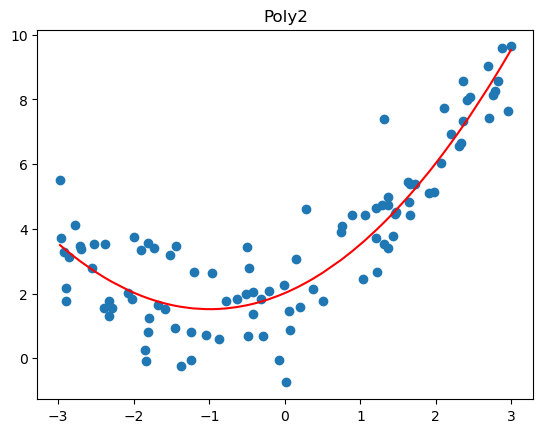

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

def PolynomialRegression(degree):
    return Pipeline([
        ("Poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(2)
poly2_reg.fit(X, y)
y2_predict = poly2_reg.predict(X)

print(f"Poly2: MSE: {mean_squared_error(y, y2_predict)}")

plt.plot(np.sort(x), y2_predict[np.argsort(x)], color="r")
plt.title("Poly2")
plt.scatter(x, y)
plt.show()

这里显然比线性回归拟合的更好。这里的degree还只是2，如果degree更高的话？

MSE: 1.0508466763764135


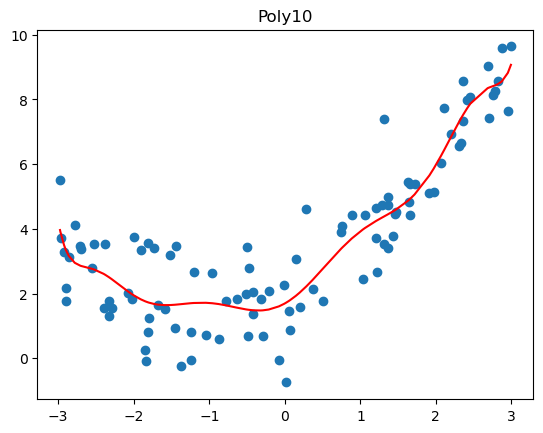

In [5]:
# degree = 10
poly10_reg = PolynomialRegression(10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
print(f"MSE: {mean_squared_error(y, y10_predict)}")
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color="r")
plt.title("Poly10")
plt.scatter(x, y)
plt.show()

从MSE上看，这里拟合的更好了。真的更好了么？

MSE: 0.6886648727190255


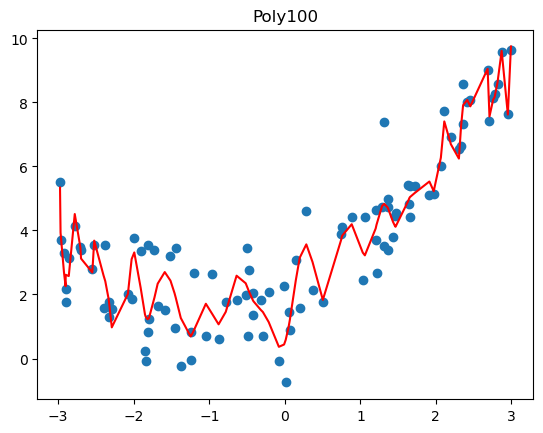

In [6]:
# degree = 100
poly100_reg = PolynomialRegression(100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
print(f"MSE: {mean_squared_error(y, y100_predict)}")
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color="r") # 注意这里不是真正的拟合后的曲线，只是x和x对应的预测值
plt.title("Poly100")
plt.scatter(x, y)
plt.show()

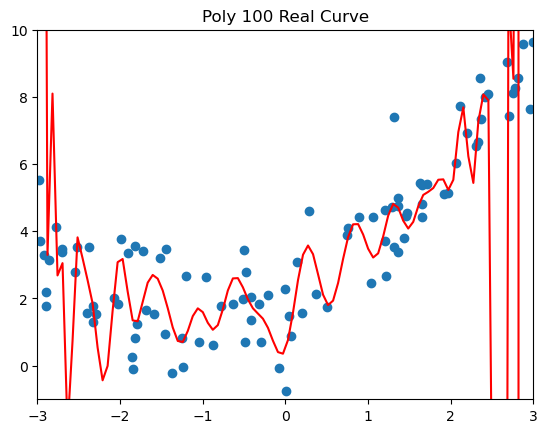

In [9]:
# degree=100时，真正的曲线是这样的
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)
plt.title("Poly 100 Real Curve")
plt.plot(X_plot[:, 0], y_plot, color="r")
plt.scatter(x, y)
plt.axis([-3, 3, -1, 10])
plt.show()